# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***
# 1.0 - Classificação

#### 1.0.1 - Métricas de Performance

Métricas de performance: 
- **Accuracy** - Mede a proporção de previsões corretas sobre o total de exemplos, mas pode ser enganosa em dados desbalanceados.
- **Precision** - Indica a proporção de previsões positivas que realmente são positivas, útil quando o custo de falsos positivos é alto.
- **Recall** - Mede a capacidade do modelo de encontrar todas as instâncias positivas, essencial quando falsos negativos são críticos.
- **F1-Score** - Média harmônica entre Precision e Recall, equilibrando os dois quando há necessidade de um compromisso entre eles.
 

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

####  1.0.2 - Importando Data de Classificação

In [3]:
#Importando dados de Treino
X_training = pd.read_csv( '../data/Classification/X_training.csv' )
y_training = pd.read_csv( '../data/Classification/y_training.csv' )

# Visualizando informações dos dados  de treino
print('Dados de Treino')
print("X_training shape:", X_training.shape)
print("y_training shape:", y_training.shape)


#Importando Dados de Validação
X_validation = pd.read_csv( '../data/Classification/X_validation.csv' )
y_validation = pd.read_csv( '../data/Classification/y_validation.csv' )

# Visualizando informações dos dados de validação
print('\nDados de Validação')
print("X_validation shape:", X_validation.shape)
print("y_valalidation shape:", y_validation.shape)


#Importando Dados de Teste
X_test = pd.read_csv( '../data/Classification/X_test.csv' )
y_test = pd.read_csv( '../data/Classification/y_test.csv' )

# Visualizando informações dos dados de teste
print('\nDados de Teste')
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Dados de Treino
X_training shape: (72515, 25)
y_training shape: (72515, 1)

Dados de Validação
X_validation shape: (31079, 25)
y_valalidation shape: (31079, 1)

Dados de Teste
X_test shape: (25893, 25)
y_test shape: (25893, 1)


In [4]:
pd.set_option('display.max_columns', None)
display(X_training.head(1))
y_training.shape

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.5,0.0,0.03958,0.6,0.6,0.6,0.6,1.0,1.0,0.25,0.6,0.6,0.6,0.5,1.0,0.6,0.4,0.0,0.013848,1.0,0.0,1.0,0.0


(72515, 1)

## 1.1 - <u>KNN Classifier</u>

Hiperparâmetros:

- **n_neigbors** - Define a quantidade de vizinhos mais próximos considerados pelo KNN para classificar um novo ponto, influenciando a sensibilidade e a generalização do modelo.

#### Treinando o modelo KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

n_neigh=5

# Converter y_training para NumPy e ajustar o formato
y_training_flat = y_training.to_numpy().ravel()

# Criar instância modelo KNN
knn_classifier = KNeighborsClassifier(n_neighbors=n_neigh)

# Treinar Modelo
knn_classifier.fit(X_training, y_training_flat)

KNeighborsClassifier()

#### Dados de Treino

In [6]:
# Fazer previsões de treino
y_pred = knn_classifier.predict(X_training)

# Cálculo das métricas
accuracy = accuracy_score(y_training, y_pred)
precision = precision_score(y_training, y_pred)
recall = recall_score(y_training, y_pred)
f1 = f1_score(y_training, y_pred)

# Criando uma nova linha com as métricas de validação
df_knn_class = pd.DataFrame({
    "Algoritmo": ["KNN Classifier"],
    "Etapa": ["Treino"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Exibir apenas a última linha inserida
df_knn_class.tail(1)

C:\Users\thoma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\thoma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,KNN Classifier,Treino,0.782,0.756,0.733,0.744


#### Dados de Validação

In [7]:
# Fazer previsões dados de teste
y_pred = knn_classifier.predict(X_validation)

# Cálculo das métricas
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["KNN Classifier"],
    "Etapa": ["Validação"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_knn_class = pd.concat([df_knn_class, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_knn_class.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
1,KNN Classifier,Validação,0.676,0.632,0.603,0.617


#### Dados de Testes

In [8]:
# Concatenar os dados de treino e teste
X_combined = pd.concat([X_training, X_validation], axis=0)
y_combined = pd.concat([y_training, y_validation], axis=0)

# Converter y_combined para NumPy e ajustar o formato
y_combined_flat  = y_combined.to_numpy().ravel()

# Retreinar o modelo KNN com os dados combinados
knn_classifier.fit(X_combined, y_combined_flat)


KNeighborsClassifier()

In [9]:
# Fazer previsões nos dados de validação
y_pred_validation = knn_classifier.predict(X_test)

# Cálculo das métricas
accuracy = accuracy_score(y_test, y_pred_validation)
precision = precision_score(y_test, y_pred_validation)
recall = recall_score(y_test, y_pred_validation)
f1 = f1_score(y_test, y_pred_validation)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["KNN Classifier"],
    "Etapa": ["Teste"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_knn_class = pd.concat([df_knn_class, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_knn_class.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
2,KNN Classifier,Teste,0.685,0.646,0.624,0.635


#### Resultado Final KNN Classifier

In [10]:
df_knn_class

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,KNN Classifier,Treino,0.782,0.756,0.733,0.744
1,KNN Classifier,Validação,0.676,0.632,0.603,0.617
2,KNN Classifier,Teste,0.685,0.646,0.624,0.635


## 1.2 - <u>Decision Tree</u>

Hiperparâmetros:

- **max_depth** - Define a profundidade máxima da árvore de decisão, controlando o quanto o modelo pode se ramificar para separar os dados e influenciando o equilíbrio entre underfitting (menor profundidade) e overfitting (maior profuncidade).

#### Treinando Modelo Decision Tree

In [11]:
from sklearn import tree

max_depth = 31

#Criar Instância Decision Tree Calssifier
decision_tree_clf = tree.DecisionTreeClassifier(max_depth = max_depth)

# Treina  Modelo  
decision_tree_clf = decision_tree_clf.fit(X_training, y_training)

#### Dados de Treino

In [12]:
# Fazer previsões de treino
y_pred = decision_tree_clf.predict(X_training)

# Cálculo das métricas
accuracy = accuracy_score(y_training, y_pred)
precision = precision_score(y_training, y_pred)
recall = recall_score(y_training, y_pred)
f1 = f1_score(y_training, y_pred)

# Criando uma nova linha com as métricas de validação
df_decision_tree = pd.DataFrame({
    "Algoritmo": ["Decision Tree"],
    "Etapa": ["Treino"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Exibir apenas a última linha inserida
df_decision_tree.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,Treino,1.0,1.0,1.0,1.0


#### Dados de Validação

In [13]:
# Fazer previsões dados de teste
y_pred = decision_tree_clf.predict(X_validation)

# Cálculo das métricas
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["Decision Tree"],
    "Etapa": ["Validação"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_decision_tree = pd.concat([df_decision_tree, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_decision_tree.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
1,Decision Tree,Validação,0.945,0.936,0.938,0.937


#### Dados de Teste

In [14]:
# Retreina o Modelo com dados combinados
decision_tree_clf = decision_tree_clf.fit(X_combined, y_combined)

In [15]:
# Fazer previsões nos dados de validação
y_pred_validation = decision_tree_clf.predict(X_test)

# Cálculo das métricas
accuracy = accuracy_score(y_test, y_pred_validation)
precision = precision_score(y_test, y_pred_validation)
recall = recall_score(y_test, y_pred_validation)
f1 = f1_score(y_test, y_pred_validation)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["Decision Tree"],
    "Etapa": ["Teste"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_decision_tree = pd.concat([df_decision_tree, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_decision_tree.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
2,Decision Tree,Teste,0.947,0.94,0.94,0.94


#### Resultado Final Decision Tree Classifier

In [16]:
df_decision_tree

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,Treino,1.000,1.000,1.000,1.000
1,Decision Tree,Validação,0.945,0.936,0.938,0.937
2,Decision Tree,Teste,0.947,0.940,0.940,0.940


## 1.3 - <u>Random Forest Classifier</u>

Hiperparâmetros: 
- **n_estimators** - Define o número de árvores na floresta, influenciando a estabilidade e a precisão do modelo. Mais árvores geralmente melhoram o desempenho, mas aumentam o custo computacional.
- **max_depth** - Define a profundidade máxima da árvore de decisão, controlando o quanto o modelo pode se ramificar para separar os dados e influenciando o equilíbrio entre underfitting (menor profundidade) e overfitting (maior profuncidade).

#### Treinando Modelo Radom Forest Classifier

In [17]:
#Importar Algorítimo
from sklearn.ensemble import RandomForestClassifier

# Definindo valores dos
n_estimators = 55
max_depth = 55

# Converter y_training para NumPy e ajustar o formato
y_training_flat = y_training.to_numpy().ravel()

#Criar Instância Ramdon Forest Calssifier
radom_forest_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

# Treina  Modelo  
radom_forest_clf = radom_forest_clf.fit(X_training, y_training_flat)

#### Dados de Treino

In [18]:
# Fazer previsões de treino
y_pred = radom_forest_clf.predict(X_training)

# Cálculo das métricas
accuracy = accuracy_score(y_training, y_pred)
precision = precision_score(y_training, y_pred)
recall = recall_score(y_training, y_pred)
f1 = f1_score(y_training, y_pred)

# Criando uma nova linha com as métricas de validação
df_rf_clf = pd.DataFrame({
    "Algoritmo": ["Radom Forest Classifier"],
    "Etapa": ["Treino"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Exibir apenas a última linha inserida
df_rf_clf.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,Radom Forest Classifier,Treino,1.0,1.0,1.0,1.0


#### Dados de Validação

In [19]:
# Fazer previsões de Validação
y_pred = radom_forest_clf.predict(X_validation)

# Cálculo das métricas
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["Radom Forest Classifier"],
    "Etapa": ["Validação"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_rf_clf = pd.concat([df_rf_clf, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_rf_clf.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
1,Radom Forest Classifier,Validação,0.964,0.972,0.944,0.958


#### Dados de Teste

In [20]:
# Retreinar o Modelo com os dados Combinados  
radom_forest_clf = radom_forest_clf.fit(X_combined, y_combined_flat)

In [21]:
# Fazer previsões de Teste
y_pred = radom_forest_clf.predict(X_test)

# Cálculo das métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["Radom Forest Classifier"],
    "Etapa": ["Teste"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_rf_clf = pd.concat([df_rf_clf, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_rf_clf.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
2,Radom Forest Classifier,Teste,0.964,0.974,0.945,0.959


#### Resultado Final Radom Forest Classifier

In [22]:
df_rf_clf

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,Radom Forest Classifier,Treino,1.000,1.000,1.000,1.000
1,Radom Forest Classifier,Validação,0.964,0.972,0.944,0.958
2,Radom Forest Classifier,Teste,0.964,0.974,0.945,0.959


## 1.4 - <u>Logistic Regression</u>

Hiperparâmetros:
- **C** - Controla a regularização da regressão logística, onde valores menores aumentam a penalização e reduzem o overfitting, enquanto valores maiores permitem um melhor ajuste aos dados.
- **solver** - Define o algoritmo de otimização usado para encontrar os coeficientes do modelo, com opções como "lbfgs" (padrão), "saga" (para grandes conjuntos de dados) e "liblinear" (para regressão logística binária).
- **max_iter** - Especifica o número máximo de iterações do algoritmo de otimização, sendo útil para garantir a convergência do modelo em dados complexos.

#### Treinando Modelo Logistic Regression

In [23]:
# Importar a classe LogisticRegression
from sklearn.linear_model import LogisticRegression

# Definir os parâmetros
C = 2.0          
solver = 'liblinear'  
max_iter = 100  

# Criar uma instância do modelo
logreg = LogisticRegression(C=C, solver=solver, max_iter=max_iter)

# Treinar o modelo com os dados de treinamento (X_training e y_training)
logreg = logreg.fit(X_training, y_training_flat)

#### Dados de Treino

In [24]:
# Fazer previsões de treino
y_pred = logreg.predict(X_training)

# Cálculo das métricas
accuracy = accuracy_score(y_training, y_pred)
precision = precision_score(y_training, y_pred)
recall = recall_score(y_training, y_pred)
f1 = f1_score(y_training, y_pred)

# Criando uma nova linha com as métricas de validação
df_log_reg = pd.DataFrame({
    "Algoritmo": ["Logistic Regression"],
    "Etapa": ["Treino"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Exibir apenas a última linha inserida
df_log_reg.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Treino,0.793,0.729,0.831,0.777


#### Dados de Validação

In [25]:
# Fazer previsões de Validação
y_pred = logreg.predict(X_validation)

# Cálculo das métricas
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["Logistic Regression"],
    "Etapa": ["Validação"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_log_reg = pd.concat([df_log_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_log_reg.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
1,Logistic Regression,Validação,0.794,0.731,0.831,0.778


#### Dados de Teste

In [26]:
# Definir os parâmetros
C = 2.0          
solver = 'liblinear'  
max_iter = 100  

# Criar uma instância do modelo
logreg = LogisticRegression(C=C, solver=solver, max_iter=max_iter)

# Treinar o modelo com os dados de treinamento (X_training e y_training)
logreg = logreg.fit(X_combined, y_combined_flat)

In [27]:
# Fazer previsões de Validação
y_pred = logreg.predict(X_test)

# Cálculo das métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Criando uma nova linha com as métricas de validação
nova_linha = pd.DataFrame({
    "Algoritmo": ["Logistic Regression"],
    "Etapa": ["Teste"],
    "Accuracy": [round(accuracy, 3)],
    "Precision": [round(precision, 3)],
    "Recall": [round(recall, 3)],
    "F1-Score": [round(f1, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_log_reg = pd.concat([df_log_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_log_reg.tail(1)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
2,Logistic Regression,Teste,0.641,0.63,0.443,0.52


#### Resultado Final Logistic Regression

In [28]:
df_log_reg

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Treino,0.793,0.729,0.831,0.777
1,Logistic Regression,Validação,0.794,0.731,0.831,0.778
2,Logistic Regression,Teste,0.641,0.630,0.443,0.520


## 1.5 - <u>Resultado Final Classificação</u>

In [29]:
# Juntar os 4 DataFrames em um único
df_classification = pd.concat([df_knn_class, df_decision_tree, df_rf_clf, df_log_reg], ignore_index=True)

# Criar DataFrames separados por etapa
df_classification_train = df_classification.query("Etapa == 'Treino'")
df_classification_val = df_classification.query("Etapa == 'Validação'")
df_classification_test = df_classification.query("Etapa == 'Teste'")

# Exibir os DataFrames criados
display(df_classification_train)
display(df_classification_val)
display(df_classification_test)

,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
0,KNN Classifier,Treino,0.782,0.756,0.733,0.744
3,Decision Tree,Treino,1.000,1.000,1.000,1.000
6,Radom Forest Classifier,Treino,1.000,1.000,1.000,1.000
9,Logistic Regression,Treino,0.793,0.729,0.831,0.777


,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
1,KNN Classifier,Validação,0.676,0.632,0.603,0.617
4,Decision Tree,Validação,0.945,0.936,0.938,0.937
7,Radom Forest Classifier,Validação,0.964,0.972,0.944,0.958
10,Logistic Regression,Validação,0.794,0.731,0.831,0.778


,Algoritmo,Etapa,Accuracy,Precision,Recall,F1-Score
2,KNN Classifier,Teste,0.685,0.646,0.624,0.635
5,Decision Tree,Teste,0.947,0.940,0.940,0.940
8,Radom Forest Classifier,Teste,0.964,0.974,0.945,0.959
11,Logistic Regression,Teste,0.641,0.630,0.443,0.520


***
# 2.0 - Regressão:

#### 2.0.1 - Métricas de Performance

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Métricas de performance: 
- **R2 (Coeficiente de Determinação)** - Mede o quão bem o modelo explica a variabilidade da variável dependente. Seu valor varia de 0 a 1, onde 1 indica que o modelo explica 100% da variabilidade dos dados e 0 indica que o modelo não explica nada.
- **MSE (Mean Squared Error - Erro Quadrático Médio)** - Calcula a média dos quadrados dos erros (diferença entre os valores reais e previstos). Como os erros são elevados ao quadrado, penaliza erros grandes mais severamente, o que pode ser útil para evitar grandes desvios.
- **RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio):** - É simplesmente a raiz quadrada do MSE. Essa métrica tem a vantagem de manter a mesma unidade da variável alvo, tornando a interpretação mais intuitiva.
- **MAE (Mean Absolute Error - Erro Médio Absoluto)** - Calcula a média dos erros absolutos entre os valores reais e previstos. Diferente do MSE, ele não eleva os erros ao quadrado, o que significa que grandes erros não são tão penalizados.
- **MAPE (Mean Absolute Percentage Error - Erro Médio Percentual Absoluto)** -Mede o erro médio percentual entre os valores reais e previstos. Diferente das outras métricas, ele é expresso em porcentagem, tornando mais fácil interpretar a precisão do modelo em termos relativos.

#### 2.0.2 - Importando Data Regressão

In [31]:
#Importando dados de Treino
X_training = pd.read_csv( '../data/Regression/X_training.csv' )
y_training = pd.read_csv( '../data/Regression/y_training.csv' )

# Visualizando informações dos dados  de treino
print('Dados de Treino')
print("X_training shape:", X_training.shape)
print("y_training shape:", y_training.shape)


#Importando Dados de Validação
X_validation = pd.read_csv( '../data/Regression/X_validation.csv' )
y_validation = pd.read_csv( '../data/Regression/y_val.csv' )

# Visualizando informações dos dados de validação
print('\nDados de Validação')
print("X_validation shape:", X_validation.shape)
print("y_valalidation shape:", y_validation.shape)


#Importando Dados de Teste
X_test = pd.read_csv( '../data/Regression/X_test.csv' )
y_test = pd.read_csv( '../data/Regression/y_test.csv' )

# Visualizando informações dos dados de teste
print('\nDados de Teste')
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Dados de Treino
X_training shape: (10547, 13)
y_training shape: (10547, 1)

Dados de Validação
X_validation shape: (4521, 13)
y_valalidation shape: (4521, 1)

Dados de Teste
X_test shape: (3767, 13)
y_test shape: (3767, 1)


In [32]:
display(X_training.head(1))
y_training.shape

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.0921,0.72,0.802,0.0,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723


(10547, 1)

## 2.1 -  <u>Decision Tree Regressor</u>

Hiperparâmetros:
- **max_depth** - Define a profundidade máxima da árvore de decisão, controlando o quanto o modelo pode se ramificar para separar os dados e influenciando o equilíbrio entre underfitting (menor profundidade) e overfitting (maior profuncidade).

#### Treinando Modelo Decision Tree Regressor

In [33]:
# Importar Algorítimo
from sklearn.tree import DecisionTreeRegressor

random_state = 0
max_depth = 28

#Criar Instância Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)

# Treina  Modelo  
decision_tree_regressor = decision_tree_regressor.fit(X_training, y_training)

#### Dados de Treino

In [34]:
# Fazer previsões de Treino
y_pred = decision_tree_regressor.predict(X_training)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred)  
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred)  

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_decision_tree_reg = pd.DataFrame({
    "Algoritmo": ["Decision Tree Regressor"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_decision_tree_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,Treino,0.991,4.401,2.098,0.286,0.084


#### Dados de Validação

In [35]:
# Fazer previsões de Validação
y_pred = decision_tree_regressor.predict(X_validation)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred)  
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Decision Tree Regressor"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_decision_tree_reg = pd.concat([df_decision_tree_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_decision_tree_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Decision Tree Regressor,Validação,-0.283,612.767,24.754,17.103,6.871


#### Dados de Teste

In [36]:
# Concatenar os dados de treino e teste
X_combined = pd.concat([X_training, X_validation], axis=0)
y_combined = pd.concat([y_training, y_validation], axis=0)

# Retreinar o Modelo com os dados combinados  
decision_tree_regressor = decision_tree_regressor.fit(X_combined, y_combined)

In [37]:
# Fazer previsões de Teste
y_pred = decision_tree_regressor.predict(X_test)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Decision Tree Regressor"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_decision_tree_reg = pd.concat([df_decision_tree_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_decision_tree_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Decision Tree Regressor,Teste,-0.179,574.155,23.962,15.826,6.04


#### Resultado Final Decision Tree Regressor

In [38]:
df_decision_tree_reg

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,Treino,0.991,4.401,2.098,0.286,0.084
1,Decision Tree Regressor,Validação,-0.283,612.767,24.754,17.103,6.871
2,Decision Tree Regressor,Teste,-0.179,574.155,23.962,15.826,6.040


## 2.2 - <u>Random Forest Regressor</u>

Hiperparâmetros:
- **max_depth** - Define a profundidade máxima da árvore de decisão, controlando o quanto o modelo pode se ramificar para separar os dados e influenciando o equilíbrio entre underfitting (menor profundidade) e overfitting (maior profuncidade).
- **n_estimators** - Define o número de árvores na floresta, influenciando a estabilidade e a precisão do modelo. Mais árvores geralmente melhoram o desempenho, mas aumentam o custo computacional.

#### Treinando o Modelo Random Forest Regressor

In [39]:
# Importar Algorítimo
from sklearn.ensemble import RandomForestRegressor

max_depth = 28
n_estimators = 165

# Criar instância do Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Converter y_training para NumPy e ajustar o formato
y_training_flat = y_training.to_numpy().ravel()

# Treinar o modelo
rf_regressor.fit(X_training, y_training_flat)

RandomForestRegressor(max_depth=28, n_estimators=165, random_state=0)

#### Dados de Treino

In [40]:
# Fazer previsões de Treino
y_pred = rf_regressor.predict(X_training)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_rf_reg = pd.DataFrame({
    "Algoritmo": ["Random Forest Regressor"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_rf_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Random Forest Regressor,Treino,0.904,45.827,6.77,4.849,2.606


#### Dados de Validação

In [41]:
# Fazer previsões de Validação
y_pred = rf_regressor.predict(X_validation)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred)  
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Random Forest Regressor"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_rf_reg = pd.concat([df_rf_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_rf_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Random Forest Regressor,Validação,0.339,315.474,17.762,12.955,7.039


#### Dados de Teste

In [42]:
# Converter y_combined para NumPy e ajustar o formato
y_combined_flat = y_combined.to_numpy().ravel()

# Retreina o Modelo com os dados combinados
rf_regressor = rf_regressor.fit(X_combined, y_combined_flat)

In [43]:
# Fazer previsões de Teste
y_pred = rf_regressor.predict(X_test)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Random Forest Regressor"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_rf_reg = pd.concat([df_rf_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_rf_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Random Forest Regressor,Teste,0.406,289.291,17.009,12.228,6.33


#### Resultado Final Random Forest Regressor

In [44]:
df_rf_reg

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Random Forest Regressor,Treino,0.904,45.827,6.770,4.849,2.606
1,Random Forest Regressor,Validação,0.339,315.474,17.762,12.955,7.039
2,Random Forest Regressor,Teste,0.406,289.291,17.009,12.228,6.330


## 2.3 - <u>Linear Regression</u> 

In [45]:
# Importar Algoritmo
from sklearn.linear_model import LinearRegression

# Criar instância do modelo Linear Regression
linear_reg = LinearRegression()

# Treinar o modelo
linear_reg = linear_reg.fit(X_training, y_training)

#### Dados de Treino

In [46]:
# Fazer previsões de Treino
y_pred = linear_reg.predict(X_training)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_linear_reg = pd.DataFrame({
    "Algoritmo": ["Linear Regression"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_linear_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression,Treino,0.046,455.996,21.354,16.998,8.653


#### Dados de Validação

In [47]:
# Fazer previsões de Validação
y_pred = linear_reg.predict(X_validation)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred)  
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_linear_reg = pd.concat([df_linear_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_linear_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Linear Regression,Validação,0.04,458.447,21.411,17.04,8.683


#### Dados de Teste

In [48]:
# Retreina o Modelo com os dados combinados
linear_reg = linear_reg.fit(X_combined, y_combined)

In [49]:
# Fazer previsões de Teste
y_pred = linear_reg.predict(X_test)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_linear_reg = pd.concat([df_linear_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_linear_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Linear Regression,Teste,0.051,461.988,21.494,17.144,8.531


#### Resultado Final Linear Regression Lasso

In [50]:
df_linear_reg

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression,Treino,0.046,455.996,21.354,16.998,8.653
1,Linear Regression,Validação,0.040,458.447,21.411,17.040,8.683
2,Linear Regression,Teste,0.051,461.988,21.494,17.144,8.531


## 2.4 - <u>Linear Regression Lasso</u> 

Hiperparâmetros: 
- **alpha** - Define a intensidade da penalização. Valores maiores aumentam a regularização.
- **max_iter**: Número máximo de iterações para o algoritmo de otimização convergir.

#### Treinando o Modelo Linear Regression Lasso

In [51]:
# Importar Algorítimo
from sklearn.linear_model import Lasso

# Hiperparâmetros
alpha = 1.2
max_iter = 20

# Criar Instância Linear Regression Lasso
lasso_reg = Lasso(alpha=alpha, max_iter=max_iter)

# Treinar o modelo
lasso_reg = lasso_reg.fit(X_training, y_training)

#### Dados de Treino

In [52]:
# Fazer previsões de Treino
y_pred = lasso_reg.predict(X_training)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_lasso_reg = pd.DataFrame({
    "Algoritmo": ["Linear Regression Lasso"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_lasso_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression Lasso,Treino,0.006,474.915,21.793,17.311,8.738


#### Dados de Validação

In [53]:
# Fazer previsões de Validação
y_pred = lasso_reg.predict(X_validation)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred)  
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression Lasso"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_lasso_reg = pd.concat([df_lasso_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_lasso_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Linear Regression Lasso,Validação,0.007,474.233,21.777,17.275,8.693


#### Dados de Teste

In [54]:
# Retreina o Modelo com os dados combinados
lasso_reg = lasso_reg.fit(X_combined, y_combined)

In [55]:
# Fazer previsões de Teste
y_pred = lasso_reg.predict(X_test)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression Lasso"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_lasso_reg = pd.concat([df_lasso_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_lasso_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Linear Regression Lasso,Teste,0.007,483.568,21.99,17.482,8.746


#### Resultado Final Linear Regression Lasso

In [56]:
df_lasso_reg

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression Lasso,Treino,0.006,474.915,21.793,17.311,8.738
1,Linear Regression Lasso,Validação,0.007,474.233,21.777,17.275,8.693
2,Linear Regression Lasso,Teste,0.007,483.568,21.990,17.482,8.746


## 2.5 - <u> Linear Regression Ridge</u> 

Parâmetros: 
- **alpha** - Define a intensidade da penalização. Valores maiores aumentam a regularização.
- **max_iter**: Número máximo de iterações para o algoritmo de otimização convergir.

#### Treinando o Modelo Linear Regression Ridge

In [57]:
# Importar Algorítimo
from sklearn.linear_model import Ridge

# Hiperparâmetros
alpha = 1.2 
maz_iter = 20

# Criar Instância Linear Regression Lasso
ridge_reg = Ridge(alpha=alpha, max_iter=max_iter)

# Treinar o modelo
ridge_reg = ridge_reg.fit(X_training, y_training)

#### Dados de Treino

In [58]:
# Fazer previsões de Treino
y_pred = ridge_reg.predict(X_training)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_ridge_reg = pd.DataFrame({
    "Algoritmo": ["Linear Regression Ridge"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_ridge_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression Ridge,Treino,0.046,455.997,21.354,16.998,8.653


#### Dados de Validação

In [59]:
# Fazer previsões de Validação
y_pred = ridge_reg.predict(X_validation)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred)  
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression Ridge"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_ridge_reg = pd.concat([df_ridge_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_ridge_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Linear Regression Ridge,Validação,0.04,458.445,21.411,17.039,8.682


#### Dados de Teste

In [60]:
# Retreina o Modelo com os dados combinados
ridge_reg = ridge_reg.fit(X_combined, y_combined)

In [61]:
# Fazer previsões de Teste
y_pred = ridge_reg.predict(X_test)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression Ridge"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_ridge_reg = pd.concat([df_ridge_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_ridge_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Linear Regression Ridge,Teste,0.051,461.988,21.494,17.144,8.532


#### Resutaldo Final Linear Regression Ridge

In [62]:
df_ridge_reg

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression Ridge,Treino,0.046,455.997,21.354,16.998,8.653
1,Linear Regression Ridge,Validação,0.040,458.445,21.411,17.039,8.682
2,Linear Regression Ridge,Teste,0.051,461.988,21.494,17.144,8.532


## 2.6 - <u>Linear Regression Elastic Net</u> 

Parâmetros: alpha, l1_ratio, max_tier

- **alpha** - Define a intensidade da penalização. Valores maiores aumentam a regularização.
- **max_iter** - Número máximo de iterações para o algoritmo de otimização convergir.
- **l1_ratio** -  Controla o equilíbrio entre a penalização L1 (Lasso) e L2 (Ridge) na regressão Elastic Net. Valores próximos de 1 favorecem a penalização L1, tornando o modelo mais esparso ao zerar coeficientes, enquanto valores próximos de 0 favorecem a penalização L2, que reduz coeficientes sem zerá-los.

#### Treinando o Modelo Linear Regression Elastic Net

In [63]:
# Importar Algoritmo
from sklearn.linear_model import ElasticNet

# Hiperparâmetros
alpha = 1.2
max_iter = 20
l1_ratio = 0.1  # Combinação entre L1 (Lasso) e L2 (Ridge)

# Criar Instância Elastic Net
elastic_net_reg = ElasticNet(alpha=alpha, max_iter=max_iter, l1_ratio=l1_ratio)

# Treinar o modelo
elastic_net_reg.fit(X_training, y_training)

ElasticNet(alpha=1.2, l1_ratio=0.1, max_iter=20)

#### Dados de Treino

In [64]:
# Fazer previsões de Treino
y_pred = elastic_net_reg.predict(X_training)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred)  
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred)  

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_elastic_net_reg = pd.DataFrame({
    "Algoritmo": ["Linear Regression Elastic Net"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_elastic_net_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression Elastic Net,Treino,0.009,473.692,21.764,17.289,8.725


#### Dados de Validação

In [65]:
# Fazer previsões de Validação
y_pred = elastic_net_reg.predict(X_validation)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred)  
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression Elastic Net"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_elastic_net_reg = pd.concat([df_elastic_net_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_elastic_net_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Linear Regression Elastic Net,Validação,0.009,473.153,21.752,17.258,8.687


#### Dados de Treino

In [66]:
# Retreinar o Modelo com os dados combinados  
elastic_net_reg = elastic_net_reg.fit(X_combined, y_combined)

In [67]:
# Fazer previsões de Teste
y_pred = elastic_net_reg.predict(X_test)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Linear Regression Elastic Net"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Adicionar a nova linha ao DataFrame existente
df_elastic_net_reg = pd.concat([df_elastic_net_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_elastic_net_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Linear Regression Elastic Net,Teste,0.009,482.487,21.966,17.461,8.736


#### Resultado Final Linear Regression Elastic Net

In [68]:
df_elastic_net_reg

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Linear Regression Elastic Net,Treino,0.009,473.692,21.764,17.289,8.725
1,Linear Regression Elastic Net,Validação,0.009,473.153,21.752,17.258,8.687
2,Linear Regression Elastic Net,Teste,0.009,482.487,21.966,17.461,8.736


## 2.7 - <u>Polynomial Regression</u>

Parâmetros: 
- **degree** - Define o grau do polinômio usado na regressão, controlando a complexidade do modelo. Um grau baixo pode levar a underfitting (modelo muito simples que não captura padrões nos dados), enquanto um grau alto pode levar a overfitting (modelo muito complexo que se ajusta demais aos dados de treino, perdendo generalização).

#### Treinando o Modelo Polynomial Regression

In [69]:
# Importar Algorítimo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Definir Grau
degree = 2

# Criar transformação polinomial
poly_features = PolynomialFeatures(degree=degree)

# Transformar os dados de entrada
X_training_poly = poly_features.fit_transform(X_training)
X_validation_poly = poly_features.fit_transform(X_validation)
X_test_poly = poly_features.fit_transform(X_test)
X_combined_poly = poly_features.fit_transform(X_combined)

# Criar instância do modelo de regressão linear
polynomial_regressor = LinearRegression()

# Treinar o modelo com os dados transformados
polynomial_regressor = polynomial_regressor.fit(X_training_poly, y_training)

#### Dados de Treino

In [70]:
# Fazer previsões de Treino
y_pred = polynomial_regressor.predict(X_training_poly)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_poly_reg = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_poly_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression,Treino,0.094,432.986,20.808,16.458,8.351


#### Dados de Validação

In [71]:
# Fazer previsões de Validação
y_pred = polynomial_regressor.predict(X_validation_poly)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred) 
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg = pd.concat([df_poly_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Polynomial Regression,Validação,0.066,445.768,21.113,16.75,8.548


#### Dados de Teste

In [72]:
# Retreinar o Modelo com os dados combinados  
polynomial_regressor = polynomial_regressor.fit(X_combined_poly, y_combined)

In [73]:
# Fazer previsões de Teste
y_pred = polynomial_regressor.predict(X_test_poly)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred)  
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg = pd.concat([df_poly_reg, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Polynomial Regression,Teste,0.091,442.641,21.039,16.736,8.277


#### Resutaldo Final Polynomial Regression

In [74]:
df_poly_reg

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression,Treino,0.094,432.986,20.808,16.458,8.351
1,Polynomial Regression,Validação,0.066,445.768,21.113,16.750,8.548
2,Polynomial Regression,Teste,0.091,442.641,21.039,16.736,8.277


## 2.8 - <u>Polynomial Regression Lasso</u> 

Parâmetros: 
- **degree** - Define o grau do polinômio usado na regressão, controlando a complexidade do modelo. Um grau baixo pode levar a underfitting (modelo muito simples que não captura padrões nos dados), enquanto um grau alto pode levar a overfitting (modelo muito complexo que se ajusta demais aos dados de treino, perdendo generalização).
- **alpha** - Define a intensidade da penalização. Valores maiores aumentam a regularização.
- **max_iter** - Número máximo de iterações para o algoritmo de otimização convergir.

#### Treinando o Modelo Polynomial Regression Lasso

In [75]:
# Importar Algorítmo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

# Hiperparâmetros
degree = 2       
alpha = 1.0      
max_iter = 1000  

# Criar transformação polinomial
poly_features = PolynomialFeatures(degree=degree)

# Transformar os dados de entrada
X_training_poly = poly_features.fit_transform(X_training)
X_validation_poly = poly_features.fit_transform(X_validation)
X_test_poly = poly_features.fit_transform(X_test)
X_combined_poly = poly_features.fit_transform(X_combined)

# Criar instância do modelo Lasso com os hiperparâmetros
lasso_reg = Lasso(alpha=alpha, max_iter=max_iter)

# Treinar o modelo com os dados transformados
lasso_reg = lasso_reg.fit(X_training_poly, y_training)

#### Dados de Treino

In [76]:
# Fazer previsões de Treino
y_pred = lasso_reg.predict(X_training_poly)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_poly_reg_lasso = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Lasso"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_poly_reg_lasso.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression Lasso,Treino,0.009,473.639,21.763,17.285,8.7


#### Dados de Validação

In [77]:
# Fazer previsões de Validação
y_pred = lasso_reg.predict(X_validation_poly)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred) 
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Lasso"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg_lasso = pd.concat([df_poly_reg_lasso, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg_lasso.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Polynomial Regression Lasso,Validação,0.01,472.913,21.747,17.238,8.682


#### Dados de Teste

In [78]:
# Retreinar o Modelo com os dados combinados  
lasso_reg = lasso_reg.fit(X_combined_poly, y_combined)

In [79]:
# Fazer previsões de Teste
y_pred = lasso_reg.predict(X_test_poly)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred)  
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Lasso"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg_lasso = pd.concat([df_poly_reg_lasso, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg_lasso.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Polynomial Regression Lasso,Teste,0.009,482.615,21.968,17.456,8.756


#### Resultado Final Polynomial Regression Lasso

In [80]:
df_poly_reg_lasso

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression Lasso,Treino,0.009,473.639,21.763,17.285,8.700
1,Polynomial Regression Lasso,Validação,0.010,472.913,21.747,17.238,8.682
2,Polynomial Regression Lasso,Teste,0.009,482.615,21.968,17.456,8.756


## 2.9- <u>Polynomial Regression Ridge</u>

Parâmetros: 
- **degree** - Define o grau do polinômio usado na regressão, controlando a complexidade do modelo. Um grau baixo pode levar a underfitting (modelo muito simples que não captura padrões nos dados), enquanto um grau alto pode levar a overfitting (modelo muito complexo que se ajusta demais aos dados de treino, perdendo generalização).
- **alpha** - Define a intensidade da penalização. Valores maiores aumentam a regularização.
- **max_iter** - Número máximo de iterações para o algoritmo de otimização convergir.

#### Treinando o Modelo Polynomial Regression Ridge

In [81]:
# Importar Algorítmo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Hiperparâmetros
degree = 2       
alpha = 1.0      
max_iter = 1000  

# Criar transformação polinomial
poly_features = PolynomialFeatures(degree=degree)

# Transformar os dados de entrada
X_training_poly = poly_features.fit_transform(X_training)
X_validation_poly = poly_features.fit_transform(X_validation)
X_test_poly = poly_features.fit_transform(X_test)
X_combined_poly = poly_features.fit_transform(X_combined)

# Criar instância do modelo Ridge com os hiperparâmetros
ridge_reg = Ridge(alpha=alpha, max_iter=max_iter)

# Treinar o modelo com os dados transformados
ridge_reg = ridge_reg.fit(X_training_poly, y_training)


#### Dados de Treino

In [82]:
# Fazer previsões de Treino
y_pred = ridge_reg.predict(X_training_poly)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_poly_reg_ridge = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Ridge"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_poly_reg_ridge.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression Ridge,Treino,0.093,433.475,20.82,16.472,8.373


#### Dados de Validação

In [83]:
# Fazer previsões de Validação
y_pred = ridge_reg.predict(X_validation_poly)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred) 
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Ridge"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg_ridge = pd.concat([df_poly_reg_ridge, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg_ridge.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Polynomial Regression Ridge,Validação,0.068,445.184,21.099,16.739,8.569


#### Dados de Teste

In [84]:
# Retreinar o Modelo com os dados combinados  
ridge_reg = ridge_reg.fit(X_combined_poly, y_combined)

In [85]:
# Fazer previsões de Teste
y_pred = ridge_reg.predict(X_test_poly)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred)  
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Ridge"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg_ridge = pd.concat([df_poly_reg_ridge, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg_ridge.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Polynomial Regression Ridge,Teste,0.09,442.967,21.047,16.742,8.309


#### Resultado Final Poliynomial Regression Ridge

In [86]:
df_poly_reg_ridge

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression Ridge,Treino,0.093,433.475,20.820,16.472,8.373
1,Polynomial Regression Ridge,Validação,0.068,445.184,21.099,16.739,8.569
2,Polynomial Regression Ridge,Teste,0.090,442.967,21.047,16.742,8.309


## 2.10 - <u>Poliynomial Regression Elastic Net</u>

Parâmetros: 
- **degree** - Define o grau do polinômio usado na regressão, controlando a complexidade do modelo. Um grau baixo pode levar a underfitting (modelo muito simples que não captura padrões nos dados), enquanto um grau alto pode levar a overfitting (modelo muito complexo que se ajusta demais aos dados de treino, perdendo generalização).
- **alpha** - Define a intensidade da penalização. Valores maiores aumentam a regularização.
- **max_iter** - Número máximo de iterações para o algoritmo de otimização convergir.
- **l1_ratio** - Controla o equilíbrio entre a penalização L1 (Lasso) e L2 (Ridge) na regressão Elastic Net. Valores próximos de 1 favorecem a penalização L1, tornando o modelo mais esparso ao zerar coeficientes, enquanto valores próximos de 0 favorecem a penalização L2, que reduz coeficientes sem zerá-los.

#### Treinando o Modelo Polynomial Regression Elastic Net

In [87]:
# Importar Algorítmo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

# Hiperparâmetros
degree = 2       
alpha = 1.0      
max_iter = 1000  
l1_ratio = 0.5   

# Criar transformação polinomial
poly_features = PolynomialFeatures(degree=degree)

# Transformar os dados de entrada
X_training_poly = poly_features.fit_transform(X_training)
X_validation_poly = poly_features.fit_transform(X_validation)
X_test_poly = poly_features.fit_transform(X_test)
X_combined_poly = poly_features.fit_transform(X_combined)

# Criar instância do modelo Elastic Net com os hiperparâmetros
elastic_net_reg = ElasticNet(alpha=alpha, max_iter=max_iter, l1_ratio=l1_ratio)

# Treinar o modelo com os dados transformados
elastic_net_reg = elastic_net_reg.fit(X_training_poly, y_training)

#### Dados de Treino

In [88]:
# Fazer previsões de Treino
y_pred = elastic_net_reg.predict(X_training_poly)

# Cálculo das métricas
r2 = r2_score(y_training, y_pred) 
mse = mean_squared_error(y_training, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_training, y_pred)  
mape = mean_absolute_percentage_error(y_training, y_pred) 

# Criando um DataFrame com as métricas como colunas e nome do algoritmo
df_poly_reg_elastic_net = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Elastic Net"],
    "Etapa": ["Treino"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})

# Exibir os resultados
df_poly_reg_elastic_net.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression Elastic Net,Treino,0.013,471.878,21.723,17.244,8.679


#### Dados de Validação

In [89]:
# Fazer previsões de Validação
y_pred = elastic_net_reg.predict(X_validation_poly)

# Cálculo das métricas
r2 = r2_score(y_validation, y_pred) 
mse = mean_squared_error(y_validation, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_validation, y_pred)  
mape = mean_absolute_percentage_error(y_validation, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Elastic Net"],
    "Etapa": ["Validação"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg_elastic_net = pd.concat([df_poly_reg_elastic_net, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg_elastic_net.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Polynomial Regression Elastic Net,Validação,0.013,471.408,21.712,17.2,8.675


#### Dados de Teste

In [90]:
# Retreinar o Modelo com os dados combinados  
elastic_net_reg = elastic_net_reg.fit(X_combined_poly, y_combined)

In [91]:
# Fazer previsões de Teste
y_pred = elastic_net_reg.predict(X_test_poly)

# Cálculo das métricas
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred)  
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Criando uma nova linha com os valores calculados
nova_linha = pd.DataFrame({
    "Algoritmo": ["Polynomial Regression Elastic Net"],
    "Etapa": ["Teste"],
    "R²": [round(r2, 3)],
    "MSE": [round(mse, 3)],
    "RMSE": [round(rmse, 3)],
    "MAE": [round(mae, 3)],
    "MAPE": [round(mape, 3)]
})


# Adicionar a nova linha ao DataFrame existente
df_poly_reg_elastic_net = pd.concat([df_poly_reg_elastic_net, nova_linha], ignore_index=True)

# Exibir apenas a última linha inserida
df_poly_reg_elastic_net.tail(1)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Polynomial Regression Elastic Net,Teste,0.011,481.537,21.944,17.427,8.754


#### Resultado Final Poliynomial Regression Elastic Net

In [92]:
df_poly_reg_elastic_net

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Polynomial Regression Elastic Net,Treino,0.013,471.878,21.723,17.244,8.679
1,Polynomial Regression Elastic Net,Validação,0.013,471.408,21.712,17.200,8.675
2,Polynomial Regression Elastic Net,Teste,0.011,481.537,21.944,17.427,8.754


## 2.11 - <u>Resultado Final Regressão</u>

In [93]:
# Juntar os 4 DataFrames em um único
df_regression = pd.concat([df_decision_tree_reg, 
                           df_rf_reg,
                           df_linear_reg,
                           df_lasso_reg, 
                           df_ridge_reg,
                           df_elastic_net_reg,
                           df_poly_reg,
                           df_poly_reg_lasso,
                           df_poly_reg_ridge,
                           df_poly_reg_elastic_net],
                           ignore_index=True)

# Criar DataFrames separados por etapa
df_regression_train = df_regression.query("Etapa == 'Treino'")
df_regression_val = df_regression.query("Etapa == 'Validação'")
df_regression_test = df_regression.query("Etapa == 'Teste'")

# Exibir os DataFrames criados
display(df_regression_train)
display(df_regression_val)
display(df_regression_test)

,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,Treino,0.991,4.401,2.098,0.286,0.084
3,Random Forest Regressor,Treino,0.904,45.827,6.770,4.849,2.606
6,Linear Regression,Treino,0.046,455.996,21.354,16.998,8.653
9,Linear Regression Lasso,Treino,0.006,474.915,21.793,17.311,8.738
12,Linear Regression Ridge,Treino,0.046,455.997,21.354,16.998,8.653
15,Linear Regression Elastic Net,Treino,0.009,473.692,21.764,17.289,8.725
18,Polynomial Regression,Treino,0.094,432.986,20.808,16.458,8.351
21,Polynomial Regression Lasso,Treino,0.009,473.639,21.763,17.285,8.700
24,Polynomial Regression Ridge,Treino,0.093,433.475,20.820,16.472,8.373
27,Polynomial Regression Elastic Net,Treino,0.013,471.878,21.723,17.244,8.679


,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
1,Decision Tree Regressor,Validação,-0.283,612.767,24.754,17.103,6.871
4,Random Forest Regressor,Validação,0.339,315.474,17.762,12.955,7.039
7,Linear Regression,Validação,0.040,458.447,21.411,17.040,8.683
10,Linear Regression Lasso,Validação,0.007,474.233,21.777,17.275,8.693
13,Linear Regression Ridge,Validação,0.040,458.445,21.411,17.039,8.682
16,Linear Regression Elastic Net,Validação,0.009,473.153,21.752,17.258,8.687
19,Polynomial Regression,Validação,0.066,445.768,21.113,16.750,8.548
22,Polynomial Regression Lasso,Validação,0.010,472.913,21.747,17.238,8.682
25,Polynomial Regression Ridge,Validação,0.068,445.184,21.099,16.739,8.569
28,Polynomial Regression Elastic Net,Validação,0.013,471.408,21.712,17.200,8.675


,Algoritmo,Etapa,R²,MSE,RMSE,MAE,MAPE
2,Decision Tree Regressor,Teste,-0.179,574.155,23.962,15.826,6.040
5,Random Forest Regressor,Teste,0.406,289.291,17.009,12.228,6.330
8,Linear Regression,Teste,0.051,461.988,21.494,17.144,8.531
11,Linear Regression Lasso,Teste,0.007,483.568,21.990,17.482,8.746
14,Linear Regression Ridge,Teste,0.051,461.988,21.494,17.144,8.532
17,Linear Regression Elastic Net,Teste,0.009,482.487,21.966,17.461,8.736
20,Polynomial Regression,Teste,0.091,442.641,21.039,16.736,8.277
23,Polynomial Regression Lasso,Teste,0.009,482.615,21.968,17.456,8.756
26,Polynomial Regression Ridge,Teste,0.090,442.967,21.047,16.742,8.309
29,Polynomial Regression Elastic Net,Teste,0.011,481.537,21.944,17.427,8.754


***
# 3.0 Agrupamento:

#### 3.0.1 - Importando Data de Clusterização/Agrupamento

In [94]:
#Importando dados de Clusterização
X = pd.read_csv( '../data/Clusterization/X_dataset.csv' )

#### 3.0.2 - Importando Métrtricas de Clusterização/Agrupamento

Métricas de performance:
- **Silhouette Score** -  mede a qualidade do agrupamento avaliando o quão bem cada ponto está inserido dentro de seu próprio cluster em comparação com outros clusters. Ele varia de -1 a 1, onde valores próximos de 1 indicam que os pontos estão bem agrupados, 0 sugere que estão na fronteira entre clusters e valores negativos indicam que os pontos podem estar em clusters errados.

In [95]:
# Importar Algorítimo
from sklearn.metrics import silhouette_score

## 3.1 -  <u>K-Means</u>

Parâmetros: 
- **k** - Define o número de clusters que o algoritmo deve formar. Ele influencia diretamente a segmentação dos dados: um k muito baixo pode resultar em grupos amplos e pouco representativos (underfitting), enquanto um k muito alto pode levar a clusters excessivamente fragmentados e sem significado real (overfitting)

#### Treinando o Modelo K-Means

C:\Users\thoma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thoma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thoma\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thoma\AppData\Ro

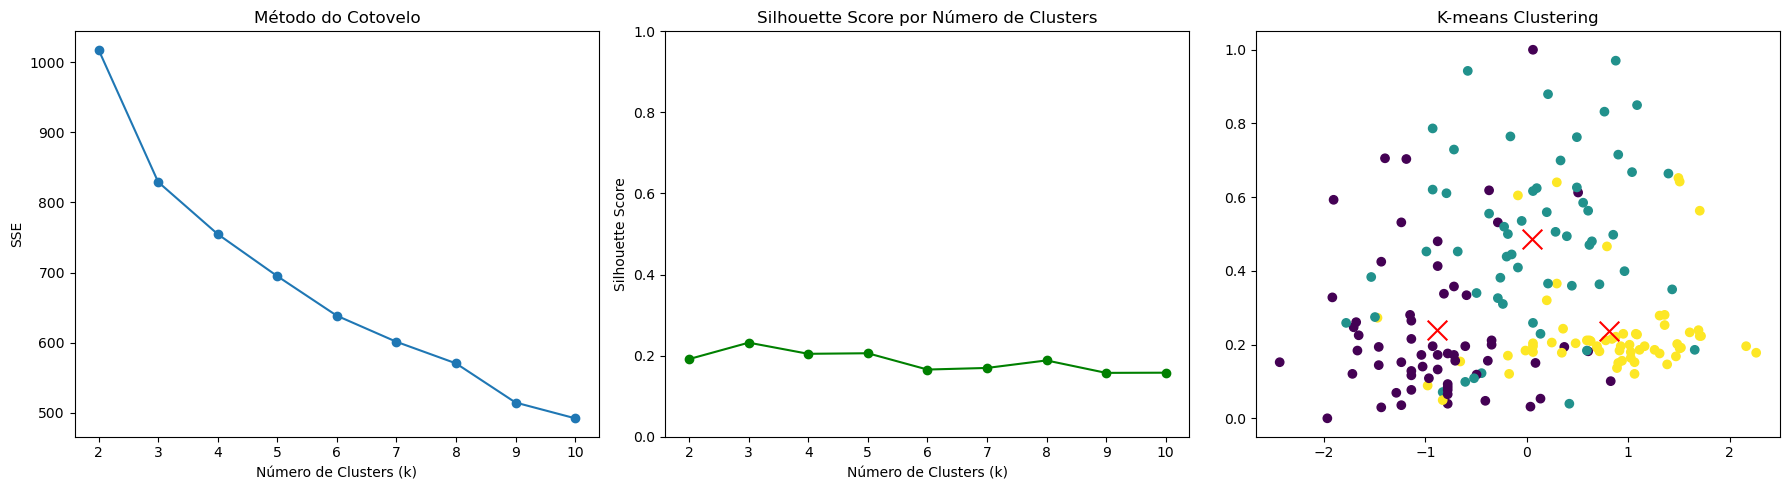

,Algoritmo,Número de Clusters,Silhouette Score
0,K-Means,3,0.232


In [96]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 1. Método do Cotovelo (SSE)
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, algorithm='lloyd')
    kmeans.fit(X)  # Sem padronização
    sse.append(kmeans.inertia_)

# 2. Cálculo do Silhouette Score para diferentes números de clusters
sil_scores = []
for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sil_score = silhouette_score(X, kmeans.labels_)
        sil_scores.append(sil_score)


# 3. Aplicação do K-means com o número de clusters escolhido
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# 4. Resultados
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Criando os subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Método do Cotovelo (SSE)
axes[0].plot(k_range, sse, marker='o')
axes[0].set_title('Método do Cotovelo')
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('SSE')

# Gráfico 2: Silhouette Score
axes[1].plot(k_range, sil_scores, marker='o', color='green')
axes[1].set_title('Silhouette Score por Número de Clusters')
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_ylim(0, 1)  # Definir o limite superior do eixo y para o Score

# Gráfico 3: K-means Clustering
axes[2].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Usando .iloc para acessar as colunas
axes[2].scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x')  # Centróides
axes[2].set_title('K-means Clustering')

# Exibindo os gráficos
plt.tight_layout()  # Ajusta os espaços entre os gráficos
plt.show()

# Calcular Silhouette Score
silhouette = silhouette_score(X, kmeans.labels_)

# Criar DataFrame para armazenar os resultados
df_kmeans_results = pd.DataFrame({
    "Algoritmo": ["K-Means"],
    "Número de Clusters": [k],
    "Silhouette Score": [round(silhouette, 3)]
})

# Exibir o DataFrame
df_kmeans_results

## 3.2 - <u>Affinity Propagation</u>

Parâmetros: 
- **preference** - Influencia o número de clusters formados, determinando a probabilidade de cada ponto de dado ser escolhido como um exemplar (representante de um cluster). Valores mais altos aumentam o número de clusters, enquanto valores mais baixos reduzem. Ajustar preference corretamente é essencial para encontrar um equilíbrio entre poucos clusters amplos e muitos clusters pequenos e específicos.

#### Treinando o Modelo Affinity Propagation

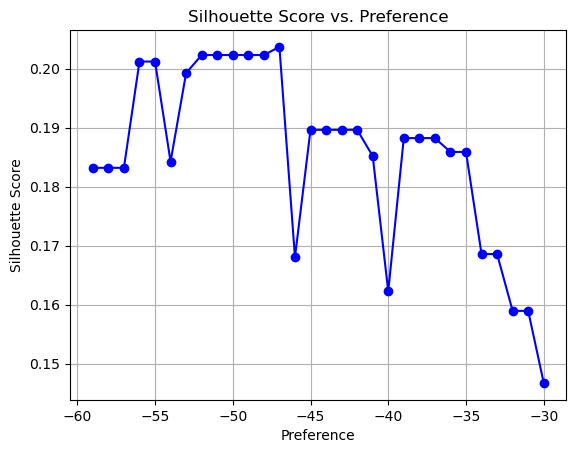

In [97]:
from sklearn.cluster import AffinityPropagation
import sklearn.cluster as ct

p = np.arange(-30, -60, -1)
ap_ss_avg_list = []

# Loop para calcular o Silhouette Score para diferentes valores de 'preference'
for i in range(len(p)):
    ap_model = ct.AffinityPropagation(preference=p[i])

    ap_labels = ap_model.fit_predict(X)  # Substitua X pelo seu conjunto de dados

    ap_ss_avg = silhouette_score(X, ap_labels)
    ap_ss_avg_list.append(ap_ss_avg)

# Gerando o gráfico de linha
plt.plot(p, ap_ss_avg_list, marker='o', color='blue')
plt.title('Silhouette Score vs. Preference')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [98]:
# Hiperparâmetro
preference = -47 

# Criar instância do modelo Affinity Propagation
affinity_propagation = AffinityPropagation(preference=preference, random_state=0)

# Treinar o modelo (ajustar os clusters aos dados)
affinity_propagation.fit(X)

# Calcular Silhouette Score
silhouette = silhouette_score(X, affinity_propagation.labels_)

# Criar DataFrame para armazenar os resultados
df_affinity_results = pd.DataFrame({
    "Algoritmo": ["Affinity Propagation"],
    "Número de Clusters": [len(np.unique(affinity_propagation.labels_))],  # Conta os clusters encontrados
    "Silhouette Score": [round(silhouette, 3)]
})

# Exibir o DataFrame
df_affinity_results

,Algoritmo,Número de Clusters,Silhouette Score
0,Affinity Propagation,7,0.204


##  3.3 - <u>Resultado Final Agrupamento</u>

In [99]:
# Juntar os 4 DataFrames em um único
df_clusterization = pd.concat([df_kmeans_results, 
                               df_affinity_results],
                               ignore_index=True)

# Exibir os DataFrames criados
df_clusterization

,Algoritmo,Número de Clusters,Silhouette Score
0,K-Means,3,0.232
1,Affinity Propagation,7,0.204
